## LINEAR REGRESSION ASSIGNMENT- BIKE DATASET

#### Multiple linear regression model for the prediction of demand for shared bikes

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



APPROACH - To perform multiple linear regression on the bike data set provided on parameters like season, year, weather situations (as our parameters)to predict the count of users(as the target) using the bike 

#### STEPS TO BE FOLLOWED

1. DATA CLEANING AND DATA UNDERSTANDING
2. PREPARATION OF THE DATASET(treating the categorical features)
3. SPLITTING THE DATASET INTO TRAINING & TESTING DATASET
4. TRAINING THE MODEL
5. RESIDUAL ANALYSIS OF THE MODEL
6. PREDICTIONS AND EVALUATIONS ON THE TEST DATASET
7. COMPARISON OF THE R SCORE OF THE TRAINING AND TEST DATASET

#### STEP 1. DATA CLEANING AND DATA UNDERSTANDING

Lets import the libraries required for loading and reading the dataset

In [533]:
import pandas as pd
import numpy as np


In [534]:
#loading the data in df
df=pd.read_csv("bike_sharing_data.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Lets obtain general information from the dataset

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [536]:
df.shape

(730, 16)

In [537]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can see that 
- there are 16 columns in total, 730 rows
- there are no null values present in any of the columns


According to the data dictionary, there are 4 columns that do not add to the information, hence we can drop these:
- instant: it is just the index number
- dteday: already we have the year, month and weekday information so this column can be dropped
- casual & registered: info of both these columns is present in the cnt column, hence we can remove them 

In [538]:
drop_columns=['instant','dteday','casual','registered']
df=df.drop(drop_columns,axis=1)

In [539]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

Now, next step will be to substitute the values of the categorical variables that are encoded in the data dictionary to the data set

1. season column

In [540]:
season_mapping = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(season_mapping)

2. year column

In [541]:
year_mapping = {0:2018,1:2019}
df['yr'] = df['yr'].map(year_mapping)

3. month column

In [542]:
month_mapping = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
df['mnth'] = df['mnth'].map(month_mapping)

4.Holiday column

In [543]:
holiday_mapping = {0:'no',1:'yes'}
df['holiday'] = df['holiday'].map(holiday_mapping)

5. Weekday column

In [544]:
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df['weekday'] = df['weekday'].map(weekday_mapping)

6. Workingday column

In [545]:
working_mapping = {0:'notWorkingDay',1:'workingDay'}
df['workingday'] = df['workingday'].map(working_mapping)

7. Weather situation
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy [CLEAR]
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist [MISTY]
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds [SHOWERS]
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog [STORMY]


In [546]:
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Showers', 4: 'Stormy'}
df['weathersit'] = df['weathersit'].map(weather_mapping)

In [547]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,no,Mon,notWorkingDay,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,Tues,notWorkingDay,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,Wed,workingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,Thurs,workingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,Fri,workingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


Lets now perform some EDA by plotting few graphs

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

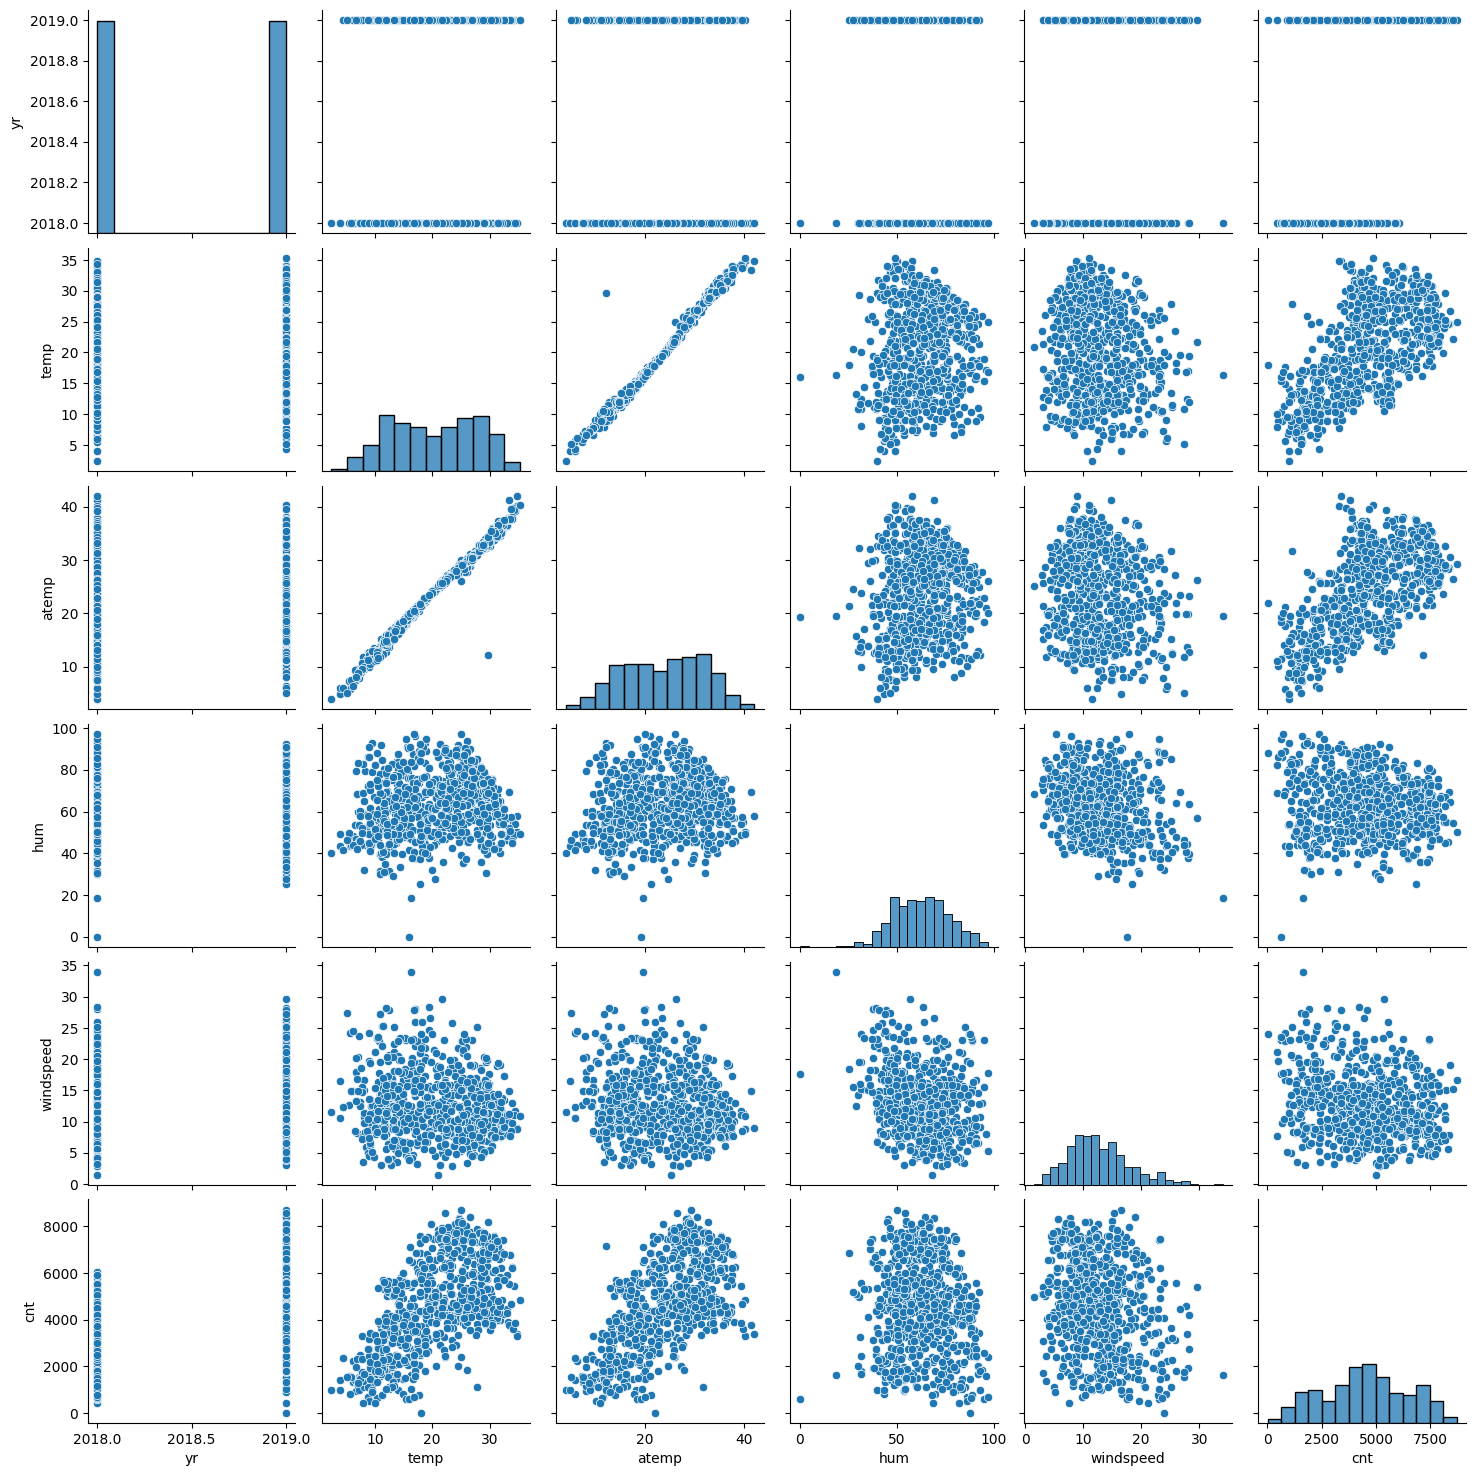

In [549]:
#visualilzation using pairplots
sns.pairplot(df)
plt.show()

Can observe that temp and atemp show a bit of linear relationship in comparison to the target variable- cnt

Lets now plot the graphs for categorical values using boxplot

C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\3871554547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=df, palette='muted')
C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\3871554547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="yr", y="cnt", data=df, palette='muted')
C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\3871554547.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mnth", y="cnt", data=df, palette='muted')
C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\3871554547.py:13: Futu

<Axes: xlabel='workingday', ylabel='cnt'>

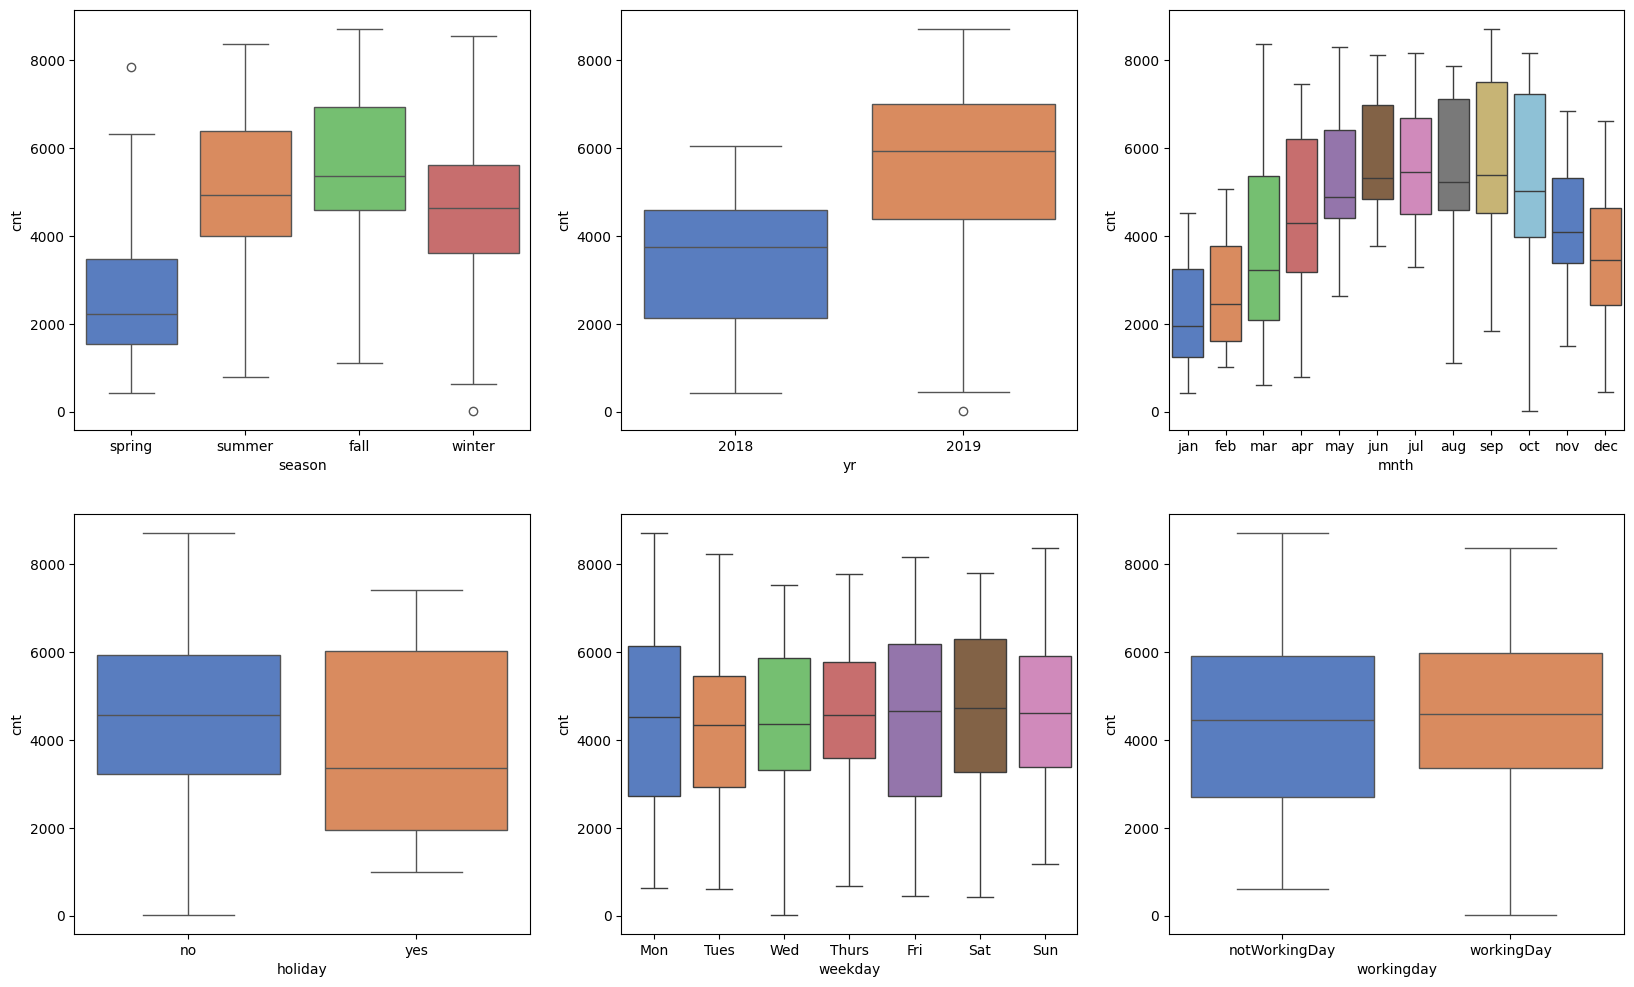

In [550]:
#there are categorical values that require visualization-> using boxplots
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=df, palette='muted')

plt.subplot(2,3,2)
sns.boxplot(x="yr", y="cnt", data=df, palette='muted')

plt.subplot(2,3,3)
sns.boxplot(x="mnth", y="cnt", data=df, palette='muted')

plt.subplot(2,3,4)
sns.boxplot(x="holiday", y="cnt", data=df, palette='muted')

plt.subplot(2,3,5)
sns.boxplot(x="weekday", y="cnt", data=df, palette='muted')

plt.subplot(2,3,6)
sns.boxplot(x="workingday", y="cnt", data=df, palette='muted')

C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\1458402899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=df, palette='muted')


<Axes: xlabel='weathersit', ylabel='cnt'>

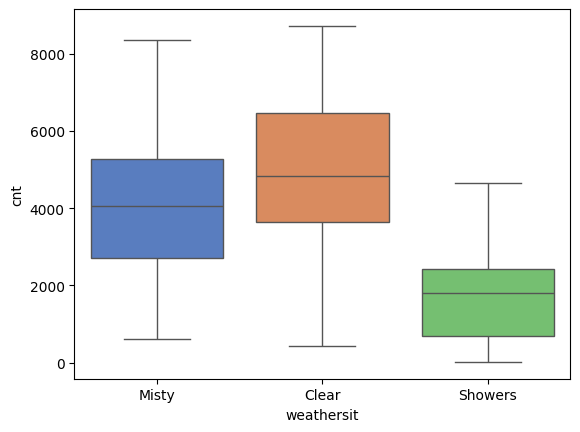

In [551]:
sns.boxplot(x="weathersit", y="cnt", data=df, palette='muted')

Analysis from the box plots there is high count of bike users in:
- fall season
- in the year 2019
- not on a holiday
- marginally higher on a monday
- slightly more on a working day
- when the weather is clear

#### 2. PREPARATION OF THE DATASET(treating the categorical features)

Steps:
Dataset still consists of categorical values, that we either need to convert into 0/1 values or use dummy variables

- convert the columns having binary values- yes/no into 0 and 1
- create dummy values for columns having more than 2 values 

Lets convert the variables having yes/no values

1. Holiday column

In [552]:
holiday_mapping_new= {'no': 0, 'yes': 1}
df['holiday'] = df['holiday'].map(holiday_mapping_new)

df['holiday'].head()

0    0
1    0
2    0
3    0
4    0
Name: holiday, dtype: int64

2. Workinday column

In [553]:
workingday_mapping_new= {'notWorkingDay':0,'workingDay':1}
df['workingday'] = df['workingday'].map(workingday_mapping_new)

df['workingday'].head()

0    0
1    0
2    1
3    1
4    1
Name: workingday, dtype: int64

3. Year column

In [554]:
year_mapping_new = {2018:0,2019:1}
df['yr'] = df['yr'].map(year_mapping_new)

df['yr'].head()

0    0
1    0
2    0
3    0
4    0
Name: yr, dtype: int64

The other categorical values have more than 2 values so we need to create dummy values for each of them. These columns are:
- season
- mnth
- weekday
- weathersit


4. Season column

In [555]:
season=pd.get_dummies(df['season'],drop_first=True)
season=season.astype(int)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [556]:
df=pd.concat([df,season],axis=1)
df=df.drop('season',axis=1)

5. Month column

In [557]:
month=pd.get_dummies(df['mnth'],drop_first=True)
month=month.astype(int)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [558]:
df=pd.concat([df,month],axis=1)
df=df.drop('mnth',axis=1)

6. Weekday column

In [559]:
weekday=pd.get_dummies(df['weekday'],drop_first=True)
weekday=weekday.astype(int)
weekday.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [560]:
df=pd.concat([df,weekday],axis=1)
df=df.drop('weekday',axis=1)


7. Weathersit column

In [561]:
weathersituation=pd.get_dummies(df['weathersit'],drop_first=True)
weathersituation=weathersituation.astype(int)
weathersituation.head()

,Misty,Showers
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [562]:
df=pd.concat([df,weathersituation],axis=1)
df=df.drop('weathersit',axis=1)


In [563]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


Currently our dataset has 30 columns, including the numerical values and the dummy values of the categorical columns

#### 3. SPLITTING THE DATASET INTO TRAINING & TESTING DATASET

In [564]:
from sklearn.model_selection import train_test_split

Dividing the dataset in the ratio of 70% training data and 30% test data

In [565]:

df_train, df_test= train_test_split(df, train_size=0.70, random_state=100)

Lets perform scaling on the training data for the numerical columns as the values of the numerical columns and categorical columns are not having the same range

In [566]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,1,0


Scaling using minmaxscaler

In [567]:

from sklearn.preprocessing import MinMaxScaler


In [568]:
#1. instantiate the object
scaler= MinMaxScaler()

# we will be scaling only the numerical variables as scaling of the categorical variables lead to ministerpretation
num_var=['temp','atemp','hum','windspeed','cnt']

df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,1,0


There almost 30 predictors present, we need to check which of the features will help us to create a more efficient model, and which features can be dropped.

Firstly lets plot a heatmap to check which feature has higher correlation

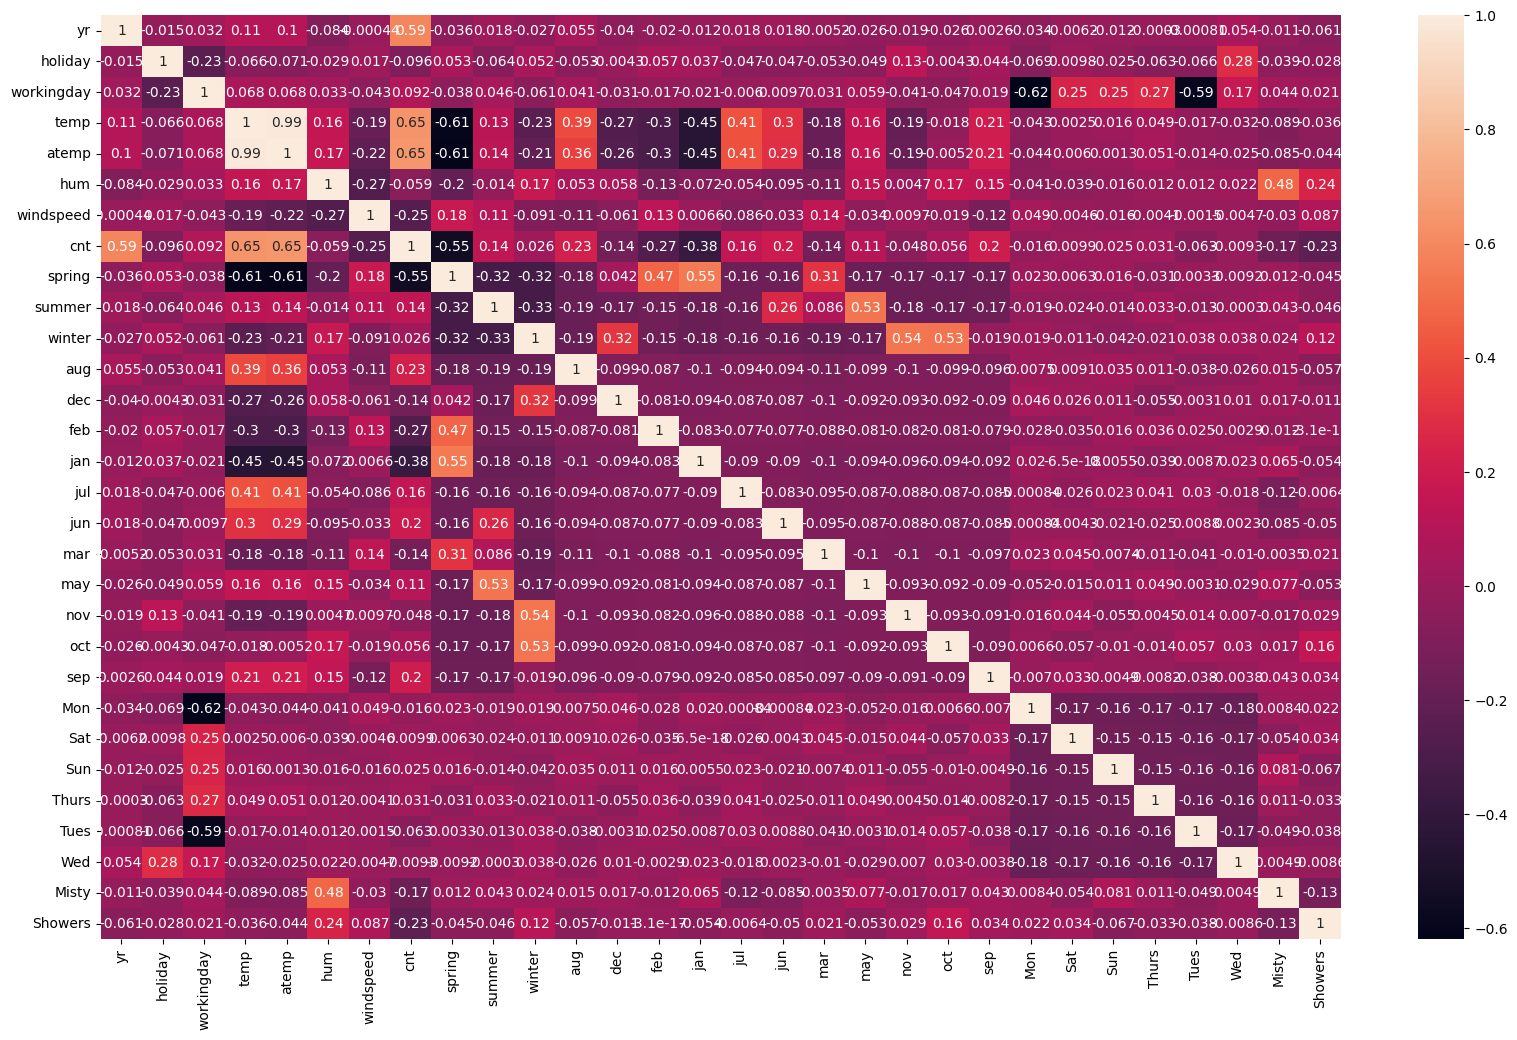

In [569]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True)
plt.show()


#### STEP 4: TRAINING THE MODEL

Dividing the df_train into X_train and y_train, where the X_train consists of predictor columns and y_train consists of target column(cnt)

In [570]:
y_train= df_train.pop('cnt')
X_train=df_train

In [571]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Lets use Recursive Feature Elimination for choosing the essential columns

In [572]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [573]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)    
rfe = rfe.fit(X_train, y_train)

In [574]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 8),
 ('mar', False, 10),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 9),
 ('Sun', False, 6),
 ('Thurs', False, 5),
 ('Tues', True, 1),
 ('Wed', False, 4),
 ('Misty', True, 1),
 ('Showers', True, 1)]

Printing the columns that rfe model shows support to as true, we will be working with these columns

In [575]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'may', 'nov', 'sep',
       'Mon', 'Tues', 'Misty', 'Showers'],
      dtype='object')

In [576]:
# Printing the columns that RFE doesn't support to be significant
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'jun', 'mar', 'oct', 'Sat', 'Sun', 'Thurs', 'Wed'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [577]:
#using the columns provided by rfe to train the model
X_train_rfe = X_train[col]

In [578]:
import statsmodels.api as sm 

In [579]:
# Adding a constant variable explicitly to the statsmodel  
X_train_rfe = sm.add_constant(X_train_rfe)

In [580]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [581]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.20e-189
Time:                        21:35:00   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2475      0.030      8.194      0.0

In [582]:
# lets also get the vif values for all the variables
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\varsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\varsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
17,Mon,inf
18,Tues,inf
7,spring,5.79
4,temp,4.88
9,winter,3.88
8,summer,3.49
12,jan,2.38
5,hum,1.97


We can see that the P-value and vif values are high for holiday, so lets drop the `holiday` column and rebuild

In [583]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.20e-189
Time:                        21:35:00   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.0

Lets calculate the vif after dropping holiday column

In [584]:
#dropping the constant value from vif calculation as it would also calculate vif for constant as it would affect the other column values of vif as well
X_train_new = X_train_new.drop(['const'], axis=1)

In [585]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
5,spring,6.06
15,Mon,5.10
4,windspeed,5.06
16,Tues,4.89
7,winter,4.40
6,summer,3.71
10,jan,2.42


We can see that the P-value and vif values are high for holiday, so lets drop the `may` column and rebuild

In [586]:
X_train_new = X_train_rfe.drop(["may","holiday"], axis = 1)

In [587]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.80e-190
Time:                        21:35:00   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.0

lets calculate the vif

In [588]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
5,spring,6.05
14,Mon,5.04
4,windspeed,4.99
15,Tues,4.85
7,winter,4.40
6,summer,3.11
10,jan,2.42


lets drop `feb` as it has highest p value

In [589]:
X_train_new = X_train_rfe.drop(["may","holiday","feb"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.52e-190
Time:                        21:35:01   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.0

In [590]:
#calculating the vif
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,spring,5.06
13,Mon,5.03
4,windspeed,4.99
14,Tues,4.83
7,winter,4.40
6,summer,3.09
15,Misty,2.35


Now we can see that the p values of the categorical values are below 0.05, we have to eliminate the values with the high vif value

The column with high vif is `humidity`, lets drop that

In [591]:
X_train_new = X_train_rfe.drop(["may","holiday","feb","hum"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.83e-188
Time:                        21:35:01   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1542      0.041      3.776      0.0

Calculating the vif

In [592]:

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.17
2,temp,13.62
3,windspeed,4.85
12,Mon,4.70
13,Tues,4.39
4,spring,4.24
6,winter,3.71
5,summer,2.78
0,yr,2.08
10,nov,1.80


Lets drop `workingday`, as it has a higher vif value

In [593]:
X_train_new = X_train_rfe.drop(["may","holiday","feb","hum","workingday"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.92e-186
Time:                        21:35:01   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2513      0.032      7.817      0.0

Calculating the vif

In [594]:

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.25
2,windspeed,4.69
5,winter,3.00
3,spring,2.91
4,summer,2.25
0,yr,2.07
9,nov,1.79
7,jan,1.66
8,jul,1.60
13,Misty,1.57


The vif value and p value is in the considerable range now, i.e p-value<0.05 and vif value <5 we will be using the features mentioned above in our model

#### 5. RESIDUAL ANALYSIS OF THE MODEL

Lets predict the values in the y column using the model, that uses the predictor features as the above - mentioned 14 columns

In [595]:
y_train_pred= lm.predict(X_train_lm)


Lets validate the assumptions of Multi linear regression model

C:\Users\varsh\AppData\Local\Temp\ipykernel_21492\3380399497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


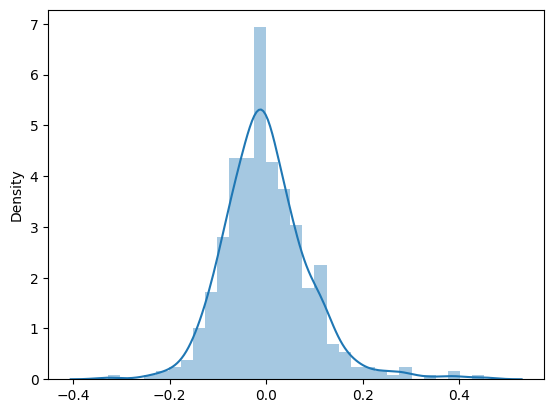

In [596]:
res= y_train_pred- y_train
sns.distplot(res)
plt.show()

We can see that the errors are normally distributed and the mean=0

Text(0, 0.5, 'y_train_pred')

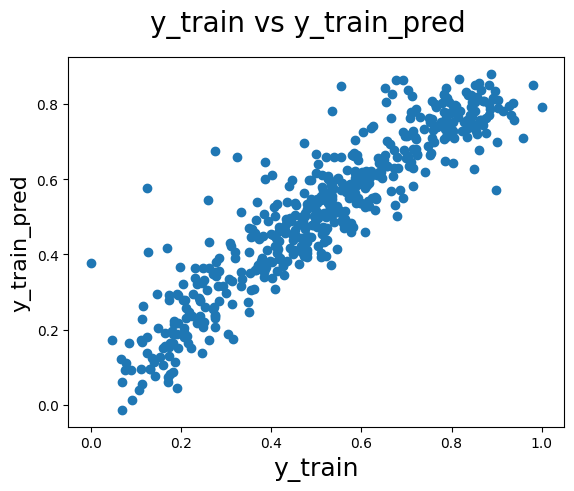

In [597]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

We can observe a linear pattern between y_train vs y_train_pred

#### 6. PREDICTIONS AND EVALUATIONS ON THE TEST DATASET

Applying the scaling on the test set- df_test

In [598]:
num_var=['temp','atemp','hum','windspeed','cnt']

df_test[num_var]=scaler.transform(df_test[num_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [599]:
#dividing the test set into y and x columns
y_test=df_test.pop('cnt')
X_test=df_test

Now let's use our model to make predictions.

In [600]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [601]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Misty,Showers
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Predicting the y_test value

In [602]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

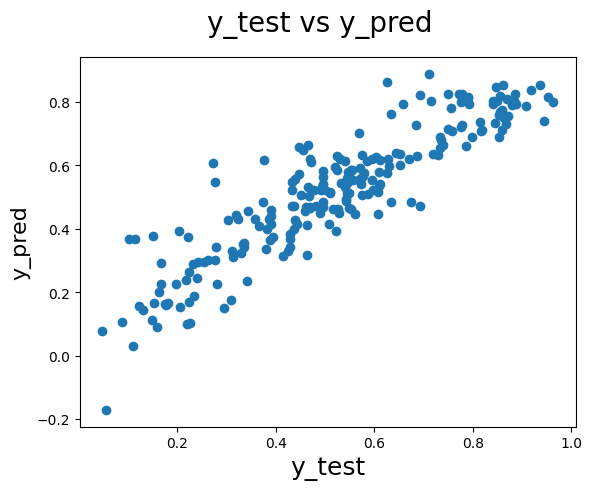

In [603]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### 7. COMPARISON OF THE R SCORE OF THE TRAINING AND TEST DATASET

In [604]:
from sklearn.metrics import r2_score

r2_score_value_train_data=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_score_value_test_data=r2_score(y_true=y_test,y_pred=y_pred)

In [605]:
print(" r2-score value of train data: ",r2_score_value_train_data)
print(" r2-score value of test data: ",r2_score_value_test_data)

 r2-score value of train data:  0.8409825848994423
 r2-score value of test data:  0.8154215584129598


We can conclude that r2 score of train data and test data are almost similar. Hence the model will predict the number of bike users using the following parameters.


y= 0.2513 + 0.2351(yr) + 0.4347(temp) -0.1619(windspeed) - 0.0737(spring) + 0.0350(summer) + 0.0891(winter) -0.0470(dec) -0.0531(jan) -0.0467(jul) -0.0489(nov) +0.0631(sep) + 0.0158(mon) -0.0437(Tues) -0.0805(Misty) -0.2939(Showers)